## Description of the task and dataset

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#input data initialization
train_data_path = '../cases/data/scoring/scoring_train.csv'
test_data_path = '../cases/data/scoring/scoring_test.csv'
df = pd.read_csv(train_data_path)
df.head(10)

,ID,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30.59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60.89DaysPastDueNotWorse,NumberOfDependents,target
0,0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,1
1,1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0
2,2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0
3,3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0
4,4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0
5,5,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0,0
6,6,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0,0
7,7,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0,0
8,8,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN,0
9,9,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0,0


In [2]:
## Baseline model

from fedot.api.main import Fedot

#task selection, initialisation of the framework
baseline_model = Fedot(problem='classification')

#fit model without optimisation - single XGBoost node is used 
baseline_model.fit(features=train_data_path, target='target', predefined_model='xgboost')

#evaluate the prediction with test data
baseline_model.predict(features=test_data_path)

#evaluate quality metric for the test sample
baseline_metrics = baseline_model.get_metrics()
print(baseline_metrics)

Fit chain from scratch
{'roc_auc': 0.827, 'f1': 0.32508833922261476}


## FEDOT AutoML for classification

In [3]:
# new instance to be used as AutoML tool
auto_model = Fedot(problem='classification', seed = 42)

In [4]:
#run of the AutoML-based model generation
pipeline = auto_model.fit(features=train_data_path, target='target')

light_tun preset is used. Parameters tuning: True. Number of candidate models: ['logit', 'lda', 'qda', 'dt', 'rf', 'knn', 'xgboost', 'bernb', 'direct_data_model', 'pca_data_model']. Composing time limit: 0:02:00
Best metric is -0.816
Generation num: 0
max_depth: 2, no improvements: 0
spent time: 0.9 min
Best metric is -0.824
Generation num: 1
max_depth: 2, no improvements: 0
spent time: 1.4 min
Best metric is -0.83
Composition time: 1.433 min
Algorithm was terminated due to processing time limit
GP composition finished
Start tuning of primary nodes
Model tuning started
Better solution found during hyperparameters tuning
Better solution found during hyperparameters tuning
Model tuning finished
Model tuning started
Better solution found during hyperparameters tuning
Better solution found during hyperparameters tuning
Better solution found during hyperparameters tuning
Model tuning finished
Model tuning started
Better solution found during hyperparameters tuning
Better solution found duri

In [7]:
prediction = auto_model.predict(features=test_data_path)
auto_metrics = auto_model.get_metrics()
print(auto_metrics)

{'roc_auc': 0.856, 'f1': 0.23323615160349853}


In [8]:
#comparison with the manual pipeline

print('Baseline', round(baseline_metrics['roc_auc'], 3))
print('AutoML solution', round(auto_metrics['roc_auc'], 3))

pipeline = auto_model.current_model

Baseline 0.827
AutoML solution 0.856


## FEDOT AutoML for the time series forecasting

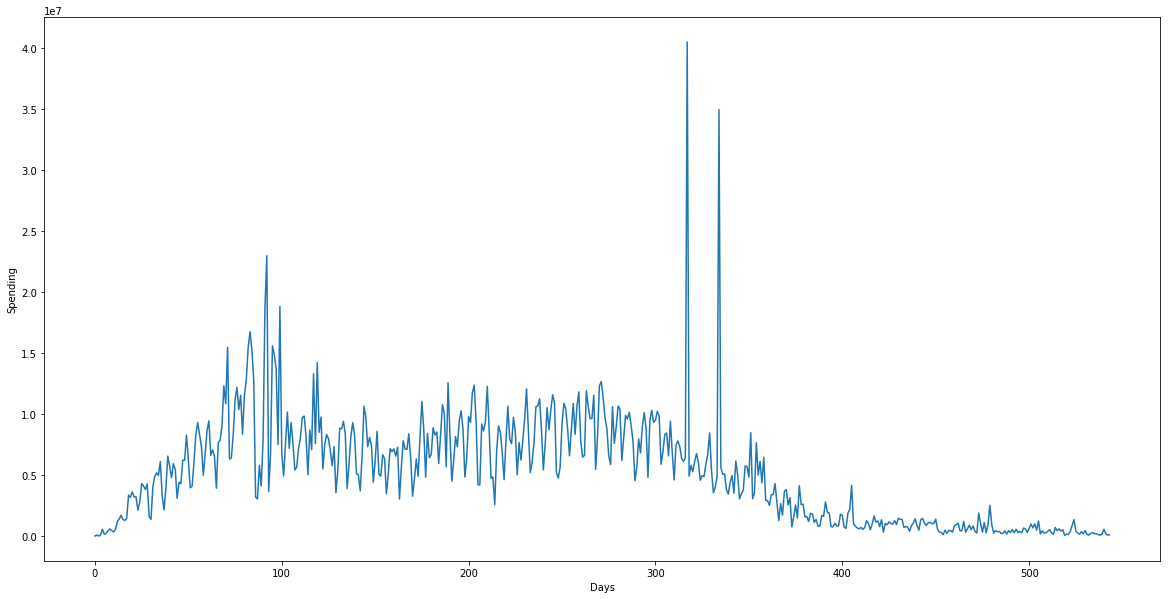

In [9]:
#read and plot the time series data

import matplotlib.pyplot as plt
import pandas as pd

train_data_path = './jupyter_media/intro/salaries.csv'
train_data = pd.read_csv(train_data_path)

plt.figure(figsize=(20,10))
plt.plot(train_data['target'])
plt.xlabel('Days')
plt.ylabel('Spending')
plt.show()

In [10]:
from fedot.api.main import Fedot

# init model for the time series forecasting
model = Fedot(problem='ts_forecasting')

light preset is used. Parameters tuning: False. Number of candidate models: ['linear', 'lasso', 'ridge', 'xgbreg', 'adareg', 'gbr', 'knnreg', 'dtreg', 'treg', 'rfr', 'svr', 'sgdr', 'trend_data_model', 'residual_data_model']. Composing time limit: 0:02:00
Best metric is 4854924.302750795
Generation num: 0
max_depth: 1, no improvements: 0
spent time: 0.8 min
Best metric is 4851948.002751331
Generation num: 1
max_depth: 1, no improvements: 0
spent time: 1.5 min
Best metric is 4851948.002751331
Composition time: 1.483 min
Algorithm was terminated due to processing time limit
GP composition finished
Fit chain from scratch


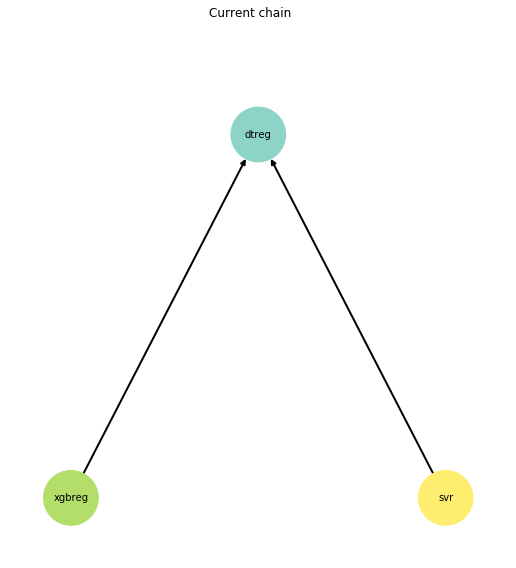

In [11]:
#run AutoML model design in the same way
chain = model.fit(features=train_data_path, target='target')
chain.show()

# use model to obtain forecast

ts_forecast = model.forecast(pre_history=train_data_path, forecast_length = 30)

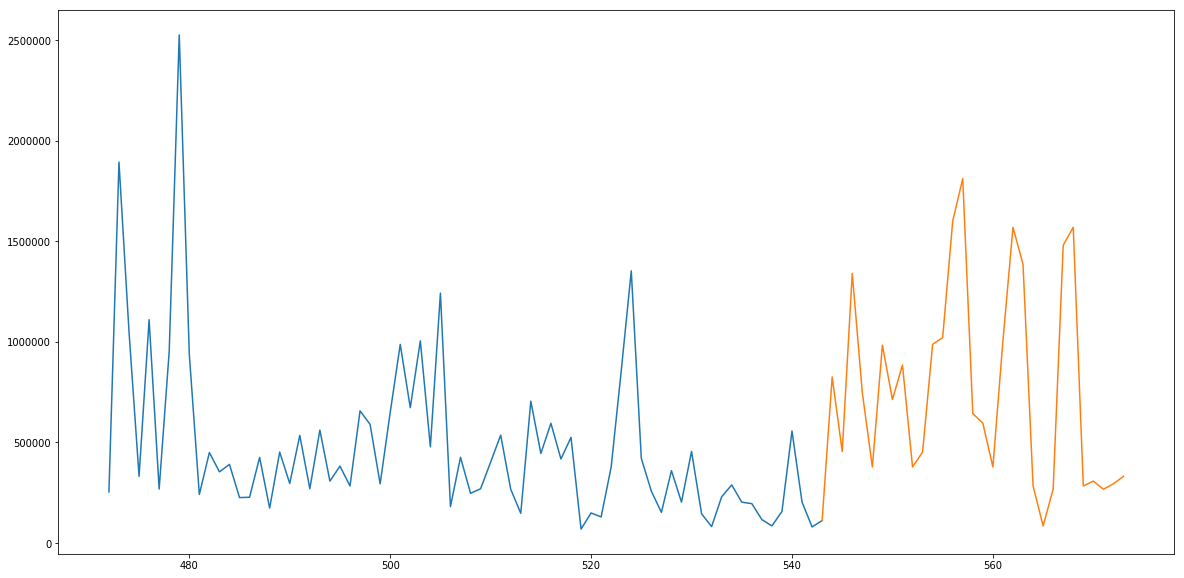

In [12]:
#plot forecasting result
model.plot_prediction()